In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# movie data
rt_movies_df = pd.read_csv('rotten_tomatoes_movies.csv')

# review data
rt_critic_reviews_df = pd.read_csv('rotten_tomatoes_critic_reviews_50k.csv')

In [5]:
rt_critic_reviews_df.dtypes

rotten_tomatoes_link    object
critic_name             object
top_critic                bool
publisher_name          object
review_type             object
review_score            object
review_date             object
review_content          object
dtype: object

In [11]:
rt_critic_reviews_df.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


In [15]:
rt_critic_reviews_df['review_type'].value_counts()

review_type
Fresh     30796
Rotten    19204
Name: count, dtype: int64

- Class imbalance in critic reviews

In [23]:
rt_critic_reviews_df.shape

(50000, 8)

In [25]:
rt_critic_reviews_df.isna().sum()

rotten_tomatoes_link        0
critic_name              1932
top_critic                  0
publisher_name              0
review_type                 0
review_score            13591
review_date                 0
review_content           8805
dtype: int64

- Over 13k missing values in 'review_score' column, out of 50k

In [19]:
rt_critic_reviews_df.isna().mean()

rotten_tomatoes_link    0.00000
critic_name             0.03864
top_critic              0.00000
publisher_name          0.00000
review_type             0.00000
review_score            0.27182
review_date             0.00000
review_content          0.17610
dtype: float64

In [27]:
rt_critic_reviews_df['review_score'].value_counts()

review_score
3/5        4529
4/5        4133
2/5        3132
3/4        2726
2/4        2003
           ... 
6.8/10        1
6.1/10        1
5.75/10       1
0.13/1        1
7.35/10       1
Name: count, Length: 189, dtype: int64

- 'review_score' does not contain standardized values

In [14]:
rt_movies_df.dtypes

rotten_tomatoes_link                 object
movie_title                          object
movie_info                           object
critics_consensus                    object
content_rating                       object
genres                               object
directors                            object
authors                              object
actors                               object
original_release_date                object
streaming_release_date               object
runtime                             float64
production_company                   object
tomatometer_status                   object
tomatometer_rating                  float64
tomatometer_count                   float64
audience_status                      object
audience_rating                     float64
audience_count                      float64
tomatometer_top_critics_count         int64
tomatometer_fresh_critics_count       int64
tomatometer_rotten_critics_count      int64
dtype: object

In [35]:
rt_movies_df.shape

(17712, 22)

In [3]:
rt_movies_df.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,17398.000000,17668.000000,17668.000000,17416.000000,1.741500e+04,17712.000000,17712.000000,17712.000000
mean,102.214048,60.884763,57.139801,60.554260,1.439401e+05,14.586326,36.374831,20.703139
std,18.702511,28.443348,68.370047,20.543369,1.763577e+06,15.146349,52.601038,30.248435
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000,7.075000e+02,3.000000,6.000000,3.000000
50%,99.000000,67.000000,28.000000,63.000000,4.277000e+03,8.000000,16.000000,8.000000
75%,111.000000,86.000000,75.000000,78.000000,2.498800e+04,23.000000,44.000000,24.000000
max,266.000000,100.000000,574.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000


In [29]:
rt_movies_df['tomatometer_status'].value_counts()

tomatometer_status
Rotten             7565
Fresh              6844
Certified-Fresh    3259
Name: count, dtype: int64

<AxesSubplot: xlabel='tomatometer_status'>

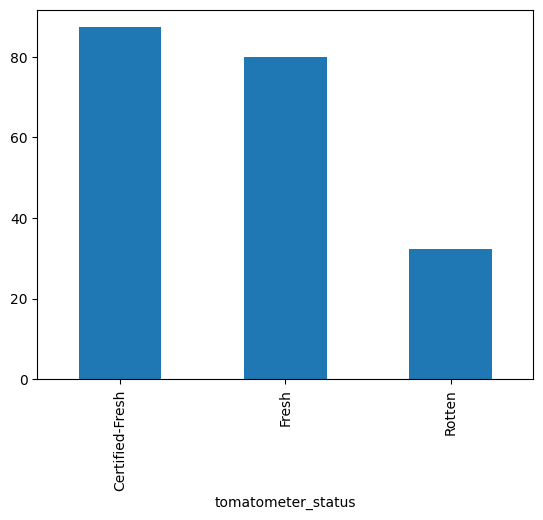

In [9]:
rt_movies_df.groupby('tomatometer_status')['tomatometer_rating'].mean().plot.bar()

In [11]:
rt_movies_df.groupby('tomatometer_status')['tomatometer_rating'].describe()

,count,mean,std,min,25%,50%,75%,max
tomatometer_status,,,,,,,,
Certified-Fresh,3259.0,87.294876,7.403723,70.0,81.0,88.0,93.0,100.0
Fresh,6844.0,79.829486,12.747414,60.0,68.0,80.0,90.0,100.0
Rotten,7565.0,32.368143,16.746049,0.0,19.0,33.0,47.0,59.0


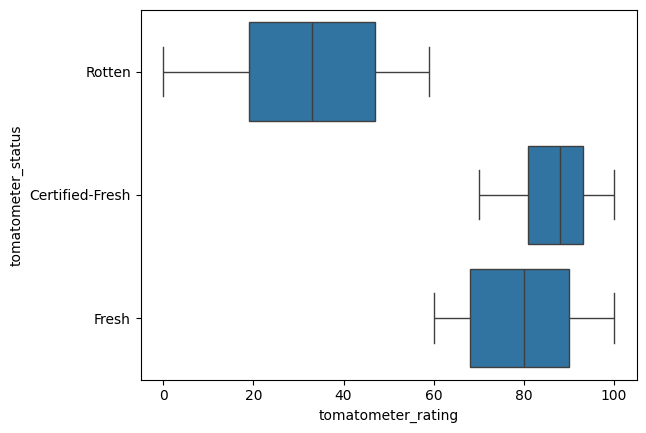

In [15]:
sns.boxplot(x='tomatometer_rating', y='tomatometer_status', data=rt_movies_df)
plt.show()

In [53]:
print("Number of movies where tomatometer rating is above 60% and tomatometer status is Rotten:", 
    ((rt_movies_df['tomatometer_rating'] > 60) & (rt_movies_df['tomatometer_status'] == 'Rotten')).sum())

Number of movies where tomatometer rating is above 60% and tomatometer status is Rotten: 0


In [55]:
print("Number of movies where tomatometer rating is below 60% and tomatometer status is NOT Rotten:", 
    ((rt_movies_df['tomatometer_rating'] < 60) & (rt_movies_df['tomatometer_status'] != 'Rotten')).sum())

Number of movies where tomatometer rating is below 60% and tomatometer status is NOT Rotten: 0


In [25]:
print("Number of movies where tomatometer rating is below 75% and tomatometer status is Certified Fresh:", 
    ((rt_movies_df['tomatometer_rating'] < 75) & (rt_movies_df['tomatometer_status'] == 'Certified-Fresh')).sum())

Number of movies where tomatometer rating is below 75% and tomatometer status is Certified Fresh: 148


In [47]:
genre_distribution = rt_movies_df['genres'].value_counts()
genre_distribution

genres
Drama                                                                                                        1887
Comedy                                                                                                       1263
Comedy, Drama                                                                                                 863
Drama, Mystery & Suspense                                                                                     731
Art House & International, Drama                                                                              589
                                                                                                             ... 
Art House & International, Comedy, Drama, Science Fiction & Fantasy, Special Interest                           1
Action & Adventure, Animation, Comedy, Kids & Family, Musical & Performing Arts                                 1
Documentary, Western                                                             

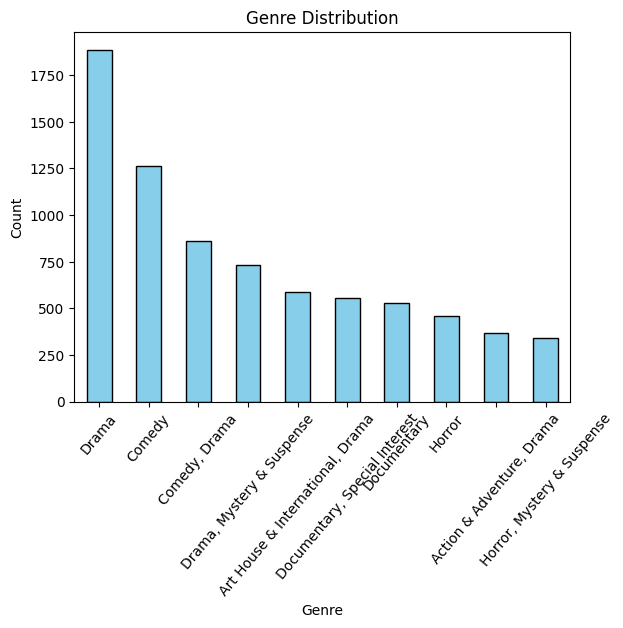

In [59]:
genre_distribution.head(10).plot.bar(color='skyblue', edgecolor='black', title='Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=50)  # rotate x-axis labels
plt.show()

In [35]:
rt_movies_df['audience_status'].value_counts()

audience_status
Upright    9390
Spilled    7874
Name: count, dtype: int64

In [39]:
correlation_matrix = rt_movies_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

plt.title("Correlation Matrix")
plt.show()

ValueError: could not convert string to float: 'm/0814255'

# Summary

## Critic Review Dataset

- 50k reviews

### review_type

- Class imbalance (19k fresh vs 30k rotten)

### review_score

- Over 13k missing values in column, out of 50k

- Scores are not standardized (ie different denominator)

## Movie Info Dataset

- 17.7k movies

- Top genres: drama and comedy

### tomatometer_status (Label)

- Class imbalance (3.2k certified-fresh vs 6.8k fresh, 7.5k rotten)

### tomatometer_rating

- Below 60% ==> Rotten

- Above 60%, Below 75% ==> Fresh

- 75% and Above ==> Fresh/Certified Fresh

- Very important feature

# How do we predict fresh vs certified fresh?

In [27]:
fresh_movies_df = rt_movies_df[rt_movies_df['tomatometer_status'].isin(['Fresh', 'Certified-Fresh'])]

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b14d6ac1-b584-4e90-810f-f88d3e20a412' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>